# Best Days to Host an Outdoor Party at the Code Louisville Office

Libraries

In [40]:
import requests
import pandas as pd
import sqlite3
from datetime import date
import calendar
import matplotlib.pyplot as plt

In [41]:
DS_API_KEY = "00b999d3b38cbf3fd6f7c14b01244f79"
LAT = 38.2535367
LONG = -85.7481863

# loop to pull all dates to target for project

In [42]:
# Returns all Saturdays, Sundays, and Holiday Mondays in 2019
potential_dates = []
year = 2019
c = calendar.TextCalendar(calendar.SUNDAY)
for m in range(1,13):
    for i in c.itermonthdays(year,m):
        if i != 0:                                      #calendar constructs months with leading zeros (days belongng to the previous month)
            day = date(year,m,i)
            if day.weekday() == 0:
                if m == 2 and 15<= i <= 21: #third Monday
                    potential_dates.append("{}-0{}-{}, President's Day".format(year,m,i))
                if m == 5 and 25 <= i <=31: #last monday of May
                    potential_dates.append("{}-0{}-{}, Memorial Day".format(year,m,i))
                if m == 9 and 1 <= i <=7: #1st Monday
                    potential_dates.append("{}-0{}-0{}, Labor Day".format(year,m,i))
                if m == 10 and 8 <= i <=14: #2nd Monday
                    potential_dates.append("{}-{}-{}, Columbus Day*".format(year,m,i))
                if m == 10 and 22 <= i <=28: #4th Monday
                    potential_dates.append("{}-{}-{}, Veterans Day".format(year,m,i))
            if day.weekday() == 5 or day.weekday() == 6: #if its Saturday or Sunday
                if m < 10:
                    if i < 10:
                        potential_dates.append("{}-0{}-0{}".format(year,m,i))
                    else:
                        potential_dates.append("{}-0{}-{}".format(year,m,i))
                elif m > 9 and i <10:
                    potential_dates.append("{}-{}-0{}".format(year,m,i))
                else:
                    potential_dates.append("{}-{}-{}".format(year,m,i))
 


print(potential_dates)

['2019-01-05', '2019-01-06', '2019-01-12', '2019-01-13', '2019-01-19', '2019-01-20', '2019-01-26', '2019-01-27', '2019-02-02', '2019-02-03', '2019-02-09', '2019-02-10', '2019-02-16', '2019-02-17', "2019-02-18, President's Day", '2019-02-23', '2019-02-24', '2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10', '2019-03-16', '2019-03-17', '2019-03-23', '2019-03-24', '2019-03-30', '2019-03-31', '2019-04-06', '2019-04-07', '2019-04-13', '2019-04-14', '2019-04-20', '2019-04-21', '2019-04-27', '2019-04-28', '2019-05-04', '2019-05-05', '2019-05-11', '2019-05-12', '2019-05-18', '2019-05-19', '2019-05-25', '2019-05-26', '2019-05-27, Memorial Day', '2019-06-01', '2019-06-02', '2019-06-08', '2019-06-09', '2019-06-15', '2019-06-16', '2019-06-22', '2019-06-23', '2019-06-29', '2019-06-30', '2019-07-06', '2019-07-07', '2019-07-13', '2019-07-14', '2019-07-20', '2019-07-21', '2019-07-27', '2019-07-28', '2019-08-03', '2019-08-04', '2019-08-10', '2019-08-11', '2019-08-17', '2019-08-18', '2019-08-24', '2

In [43]:
len(potential_dates)

109

# API call with nested *Summary* data to SQL DB and .csv

In [53]:
def request_loop(list,year,years_back):
    starting_year = int(year)- years_back
    ending_year = int(year)
    mm_dd_list =[]
    year_list =[]
    #pull out list item by index
    for target_day in list:
        if len(target_day)> 10:
            mm_dd = target_day[5:10]
        else:
            mm_dd = target_day[5:]
        for year in range(starting_year, ending_year):
            stryear = str(year)
            try:
                dark_sky_request = requests.get("https://api.darksky.net/forecast/" + DS_API_KEY + "/" + LAT +"," + LONG + "," + stryear + "-" + mm_dd + "T00:00:00?exclude=currently,flags,alerts")
                if target_day == list[0] and year == starting_year:
                    weather_summary_dataframe = pd.DataFrame.from_dict(dark_sky_request.json()['daily']['data'], orient = 'columns')
                else:
                    weather_summary_dataframe = weather_summary_dataframe.append(pd.DataFrame.from_dict(dark_sky_request.json()['daily']['data'], orient = 'columns'))
                mm_dd_list.append(mm_dd)
                year_list.append(stryear)
            except KeyError:
                print(str(year)+ '-' + mm_dd)
                continue
    weather_summary_dataframe["MM_DD"]= mm_dd_list
    weather_summary_dataframe["Year"]= year_list
    weather_summary_dataframe.to_csv('weather_summary_dataframe.csv')
    weather_summary_dataframe.to_sql("weather summary",sqlite3.connect("Weather_summary.db"), if_exists ="replace")
    return weather_summary_dataframe
    

request_loop(potential_dates,2019,10)

TypeError: can only concatenate str (not "float") to str

In [5]:
all_weather = sqlite3.connect("Weather_summary.db")
potential_days = pd.read_sql_query("SELECT MM_DD, Year, apparentTemperatureHigh, apparentTemperatureLow, precipAccumulation FROM 'weather summary'",all_weather)
potential_days

,MM_DD,Year,apparentTemperatureHigh,apparentTemperatureLow,precipAccumulation
0,01-05,2009,33.56,30.57,NaN
1,01-05,2010,19.43,11.10,NaN
2,01-05,2011,36.80,26.28,NaN
3,01-05,2012,54.80,40.14,NaN
4,01-05,2013,45.04,36.93,NaN
5,01-05,2014,54.30,-13.89,NaN
6,01-05,2015,24.81,22.60,NaN
7,01-05,2016,37.79,20.80,NaN
8,01-05,2017,25.38,11.89,0.041
9,01-05,2018,20.01,-0.17,NaN


In [54]:
all_weather = sqlite3.connect("Weather_summary.db")
potential_days = pd.read_sql_query("SELECT MM_DD, Year, apparentTemperatureHigh, apparentTemperatureLow, precipAccumulation FROM 'weather summary'WHERE apparentTemperatureHigh < 80 And apparentTemperatureLow > 50 ",all_weather)
potential_days

,MM_DD,Year,apparentTemperatureHigh,apparentTemperatureLow,precipAccumulation
0,01-12,2013,67.31,58.78,None
1,02-02,2016,67.34,53.34,None
2,02-09,2009,69.47,54.50,None
3,02-10,2009,56.52,56.91,None
4,02-10,2017,57.46,52.69,None
5,02-16,2011,69.00,52.60,None
6,02-17,2011,64.52,61.08,None
7,02-23,2017,69.98,61.09,None
8,02-23,2018,65.86,50.63,None
9,03-03,2011,60.04,50.32,None


In [56]:
potential_days_count = potential_days.groupby('MM_DD').count()
potential_days_count

,Year,apparentTemperatureHigh,apparentTemperatureLow,precipAccumulation
MM_DD,,,,
01-12,1,1,1,0
02-02,1,1,1,0
02-09,1,1,1,0
02-10,2,2,2,0
02-16,1,1,1,0
02-17,1,1,1,0
02-23,2,2,2,0
03-03,1,1,1,0
03-09,4,4,4,0


In [29]:
precip_days = pd.read_sql_query("SELECT MM_DD,precipAccumulation FROM 'weather summary'",all_weather)
precip_count = precip_days.groupby('MM_DD').count()
precip_count.head(5)

,precipAccumulation
MM_DD,
01-05,1
01-06,0
01-12,1
01-13,1
01-19,0


In [34]:
hi_low_days = pd.read_sql_query("SELECT MM_DD, apparentTemperatureHigh, apparentTemperatureLow FROM 'weather summary'",all_weather)
avg_hi_low_days = hi_low_days.groupby('MM_DD').mean()
avg_hi_low_days.head()

,apparentTemperatureHigh,apparentTemperatureLow
MM_DD,,
01-05,35.192,18.625
01-06,30.790,16.188
01-12,41.668,24.698
01-13,34.858,22.158
01-19,41.471,29.881


In [23]:
#groupby MM_DD avg high
hi_days = pd.read_sql_query("SELECT MM_DD, apparentTemperatureHigh FROM 'weather summary'",all_weather)
avg_hi_days = hi_days.groupby('MM_DD').mean()
avg_hi_days.head()

,apparentTemperatureHigh
MM_DD,
01-05,35.192
01-06,30.790
01-12,41.668
01-13,34.858
01-19,41.471


In [25]:
#groupby MM_DD avg Low
low_days = pd.read_sql_query("SELECT MM_DD, apparentTemperatureLow FROM 'weather summary'",all_weather)
avg_low_days = low_days.groupby('MM_DD').mean()
avg_low_days.head()

,apparentTemperatureLow
MM_DD,
01-05,18.625
01-06,16.188
01-12,24.698
01-13,22.158
01-19,29.881


In [35]:
#avg_days = avg_hi_days.merge(avg_low_days, on ='MM_DD')
avg_days_precip_count = avg_hi_low_days.merge(precip_count, on ='MM_DD')
avg_days_precip_count.head()

,apparentTemperatureHigh,apparentTemperatureLow,precipAccumulation
MM_DD,,,
01-05,35.192,18.625,1
01-06,30.790,16.188,0
01-12,41.668,24.698,1
01-13,34.858,22.158,1
01-19,41.471,29.881,0


NameError: name 'height' is not defined

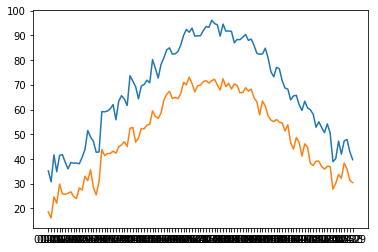

In [50]:
plt.plot(avg_hi_low_days)
plt.bar(precip_count,)